<a href="https://colab.research.google.com/github/Ekaterina-Kostina/study/blob/ML/Kostina_ML_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

`machine learning course 2025 (с) mssvctr`

### Домашнее задание 1

**Titanic challenge** - самое известное соревнование по Data Science

Используйте данные о пассажирах Титаника, чтобы построить свой классификатор, который предсказывает вероятность гибели пассажира на печально известном корабле

#### Шаг 1: импорт библиотек

Заполните плейсхолдеры

In [18]:
# импортируйте pandas, numpy, seaborn и matplotlib
# не забывайте о том, что каждая из этих библиотек
# использует свои сокращения

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

# далее мы импортируем миллион методов из scikit-learn
# эта часть уже выполнена, ура!

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#### Шаг 2: загружаем данные с Титаника

In [19]:
# выгрузим датасет напрямую с URL
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Шаг 3: анализ данных

Опишите данные и укажите в комментариях к коду ответы на вопросы:

1. выведите df.info()
  - в каких столбцах есть NaN'ы?
  - ориентируясь на количество NaN'ов в столбцах, определите, какие строки "не жалко" выбросить, а какие лучше сохранить
2. визуализируйте распределение классов по столбцу `Survived`
  - сбалансировали ли классы в нашем датасете?
3. выведите список столбцов, в которых представлены категориальные данные
  - почему категориальные данные нужно будет обработать перед запуском обучения модели?

In [20]:
### ваш код + ответы на вопросы здесь ###
df.info()
print(df.isnull().sum())
# NaN есть в столбцах age, cabin и embarked
# больше всего NaN в столбце cabin, его можно удалить, чтобы он не «зашумлял» данные
# можно удалить 2 строки, где есть NaN в embarked — их не жалко выбросить


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


,proportion
Survived,
0,0.616162
1,0.383838


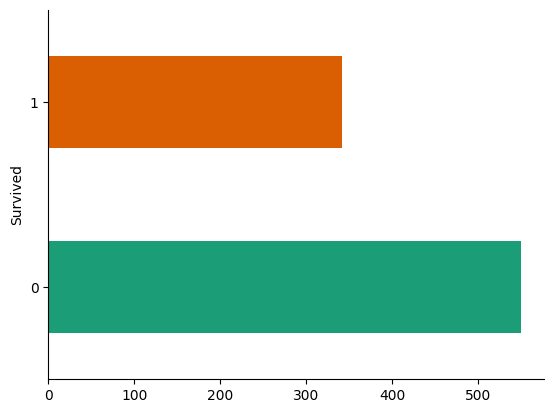

In [21]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Survived').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

df['Survived'].value_counts(normalize=True) # данные не совсем сбалансированы, соотношение классов в столбце Survived — 60/40, но я погуглила, что это в целом нормальное соотношение и не является дисбалансом

In [22]:
df_cat = df[['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']]
print(df_cat)
# Категориальные данные – это переменные, которые принимают ограниченный набор значений (категорий, классов) и не имеют числового смысла.
# Перед запуском обучения модели нужно будет обработать кат. данные (=привести их в числовой вид), чтобы модель работала с числами

                                                  Name     Sex  \
0                              Braund, Mr. Owen Harris    male   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female   
2                               Heikkinen, Miss. Laina  female   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   
4                             Allen, Mr. William Henry    male   
..                                                 ...     ...   
886                              Montvila, Rev. Juozas    male   
887                       Graham, Miss. Margaret Edith  female   
888           Johnston, Miss. Catherine Helen "Carrie"  female   
889                              Behr, Mr. Karl Howell    male   
890                                Dooley, Mr. Patrick    male   

               Ticket Cabin Embarked  
0           A/5 21171   NaN        S  
1            PC 17599   C85        C  
2    STON/O2. 3101282   NaN        S  
3              113803  C123        S  
4           

#### Шаг 4: анализ данных

Ответы на эти вопросы помогут вам принять решения для препроцессинга данных:

- требуется ли балансировка классов? — *нет, дисбаланс не сильный*
- какие столбцы нужно дропнуть? — *'PassengerId', 'Name', 'Ticket' и 'Cabin'*
- какие данные нужно преобразовать к виду числовых? — *Sex, Embarcked*

**Дропаем столбцы**

Оставим классы в покое и сразу перейдем к очистке таблицы

Есть два пути:

- дропнуть "лишние" столбцы из исходной таблицы
- создать новую таблицу, в которую мы занесем только "нужные" столбцы

Выберите любой способ и создайте новый датафрейм, очищенный от неинформативных столбцов, в которых много NaN'ов

In [23]:
df.drop(columns=['Cabin'], inplace=True) # удаляем столбец где много NaN
df = df.drop(columns=['PassengerId', 'Name', 'Ticket']) # удаляем неинформативные столбцы, которые не дадут нам никакой информации
df.dropna(subset=['Embarked'], inplace=True) # удаляем 2 строки с NaN в Embarked
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [ ]:
"""
ПРИМЕР ОЧИЩЕННОЙ ТАБЛИЦЫ
"""

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0


**Categorical --> Numerical**

Для преобразования категориальных данных к виду чисел, в sklearn используется метод `LabelEncoder`

- документация [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

Метод автоматически заменяет категориальные метки на целые числа

In [ ]:
# образец кодирования столбца 'Sex' с LabelEncoder
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])  # 0 = female, 1 = male
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,22.0,1,0,7.2500,S,0
1,1,0,38.0,1,0,71.2833,C,1
2,3,0,26.0,0,0,7.9250,S,1
3,1,0,35.0,1,0,53.1000,S,1
4,3,1,35.0,0,0,8.0500,S,0


Рассмотрим еще один метод: мы имитируем one-hot encoding с помощью метода `get_dummies` из Pandas

- [документация метода](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)

Принцип работы one-hot-encoding:

- как мы закодируем цифры 1 и 9, чтобы получить разреженный массив?
- создаем матрицу из двух векторов размерностью 10
  ```
  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] # цифра 1
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1] # цифра 9
  ```
- единица означает позицию цифры в ряде `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`
- также:
  - единица означает `True` (число находится в этой позиции)
  - ноль означает `False` (число не находится в этой позиции)

При использовании этого метода в датафреймах, мы также создаем три новых столбца (три новых вектора), в которых помечаем `True` соответствие данной метке

In [ ]:
# образец кодирования столбца 'Embarked' с get_dummies
# в Embarked у нас три метки: C, Q, S
# метки означают станцию посадки данного пассажира
df = pd.get_dummies(df, columns=['Embarked'])  # one-hot encoding
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived,Embarked_C,Embarked_Q,Embarked_S
0,3,1,22.0,1,0,7.2500,0,False,False,True
1,1,0,38.0,1,0,71.2833,1,True,False,False
2,3,0,26.0,0,0,7.9250,1,False,False,True
3,1,0,35.0,1,0,53.1000,1,False,False,True
4,3,1,35.0,0,0,8.0500,0,False,False,True


Теперь обновите ваш датафрейм: замените с использованием изученных методов категориальные данные на числовые

Изучите документацию и найдите дополнительные материалы, ответьте на вопрос: чем `LabelEncoder` отличается от `get_dummies` и когда какой метод лучше использовать?

In [24]:
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])  # Label Encoder
df = pd.get_dummies(df, columns=['Embarked'])  # one-hot encoding
df.head()

# Label Encoder Подходит для переменных, где числовой порядок категорий может иметь смысл (например, низкий-средний-высокий), но не подходит для кодирования переменных без порядка
# get_dummies создает отдельные столбцы под каждую категорию, поэтому подходит для независимых категорий (станция посадки, цвета и т.д.)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,False,False,True
1,1,1,0,38.0,1,0,71.2833,True,False,False
2,1,3,0,26.0,0,0,7.9250,False,False,True
3,1,1,0,35.0,1,0,53.1000,False,False,True
4,0,3,1,35.0,0,0,8.0500,False,False,True


**Заполняем пропуски**

Мы убрали лишние столбцы, но NaN'ы по-прежнему есть в нашем датафрейме

Рассмотрим метод `SimpleImputer` из sklearn для заполнения пропусков в данных

- [документация SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)

In [25]:
# заполняем пропуски в столбце Age
imputer = SimpleImputer(strategy="mean")
df['Age'] = imputer.fit_transform(df[['Age']])

Изучите документацию sklearn и ответьте на вопросы: какие стратегии доступы для работы с методом SimpleImputer? Чем они отличаются? Какие стратегии подойдут для работы с категориальными данными?

1. какие стратегии доступы для работы с методом SimpleImputer? —


* "mean" — среднее значение столбца.
* "median" — медиана.
* "most_frequent" — самое частое значение.
* "constant" — заменяет все NaN на заданное значение (fill_value).


2. Чем они отличаются? — mean и median можно использовать только с числовыми данными, а most_frequent и Constant — с числовым и строковым типом данных

3. Какие стратегии подойдут для работы с категориальными данными? — most_frequent и Constant

**Feature Engineering**

> Данные - это пища для вашей модели

Слишком шумные данные вызовут отравление модели (кстати, один из методов киберпреступности, построенный на работе с данными, так и называется - data poisoning!)

Недостаточность в данных может стать причиной недообучения (underfitting), поэтому мы можем не только дропать, но и добавлять фичи, т.е. признаки, на которых будет учиться наша модель

Этот процесс называется **feature engineering**

In [26]:
# Добавим фичу Family size = SibSp + Parch + 1 (единица обозначает самого пассажира)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Фича Alone для тех, кто путешествует один
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,FamilySize,IsAlone
0,0,3,1,22.0,1,0,7.2500,False,False,True,2,0
1,1,1,0,38.0,1,0,71.2833,True,False,False,2,0
2,1,3,0,26.0,0,0,7.9250,False,False,True,1,1
3,1,1,0,35.0,1,0,53.1000,False,False,True,2,0
4,0,3,1,35.0,0,0,8.0500,False,False,True,1,1


Добавьте любую новую фичу в датафрейм, которая легко выводится из данных

Например, можно вытащить обращения к пассажирам из столбца `Name` из исходной таблицы: `Mr., Mrs., Dr.`

Для этого изучите внимательно данные, познакомьтесь с описанием датасета на Kaggle

- https://www.kaggle.com/c/titanic/

Вам нужно самостоятельно решить, что можно извлечь из этих данных, как назвать новую фичу и избавиться от категориальных меток

In [28]:
# добавим фичу Luxury — она покажет, насколько дорогой билет для своего класса купил пассажир
df['LuxuryIndicator'] = (df['Fare'] > df.groupby('Pclass')['Fare'].transform('median')).astype(int)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,FamilySize,IsAlone,LuxuryIndicator
0,0,3,1,22.0,1,0,7.2500,False,False,True,2,0,0
1,1,1,0,38.0,1,0,71.2833,True,False,False,2,0,1
2,1,3,0,26.0,0,0,7.9250,False,False,True,1,1,0
3,1,1,0,35.0,1,0,53.1000,False,False,True,2,0,0
4,0,3,1,35.0,0,0,8.0500,False,False,True,1,1,0


#### Шаг 5: обучение

Создаем пары `data - label`

In [30]:
X = df.drop(columns=['Survived']) # данные = все столбцы кроме метки Survived
y = df['Survived'] # метки = только столбец Survived

Вспомните прошлое занятие: примените метод `train_test_split`

Создайте 2 выборки данных в соотношении 80 на 20

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Изучите информацию о том, как работает логистическая регрессия и ответьте на вопрос: какую роль играет `StandardScaler` в работе с логистической регрессией? — этот метод позволяет станжартизировать признаки, если они находятся в разных диапазонах (например, у нас возраст в диапазоне от 0 до 100, а другие признаки от 0 до 1)

In [32]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Обучение, как и в случае работы с линейной регрессией, займет всего пару строк

Опишите основной принцип работы логистической регрессии своими словами (2-3 предложения достаточно)

Предварительно изучите материал: https://web.stanford.edu/~jurafsky/slp3/5.pdf

Основной принцип работы логистической регрессии — это тип регрессии, при котором мы оцениваем наличие связи между бинарной зависимой переменной и одной или несколькими независимыми переменными.
Сначала модель оценивает все факторы, а потом предсказывает вероятность события. Для превращения линейной комбинации факторов в вероятность используется сигмоида.

In [33]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# предсказания
y_pred_log = log_reg.predict(X_test_scaled)

# вывод репорта
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

Logistic Regression Performance:
Accuracy: 0.8033707865168539
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       109
           1       0.74      0.77      0.75        69

    accuracy                           0.80       178
   macro avg       0.79      0.80      0.79       178
weighted avg       0.81      0.80      0.80       178



Повторим магию и обучим наивные байесовский классификатор. Что значит `Gaussian` в названии метода `GaussianNB`? Изучите документацию метода, чтобы ответить на этот вопрос — он основан на нормальном (гауссовском) распределении

Почему для этого метода не нужен StandardScaler? — потому что этот метод вычисляет вероятности на основе статистических параметров (среднее и дисперсия), а стандартизация никак не влияет на принадлежность к классу

In [34]:
nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)

print("Naïve Bayes Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Naïve Bayes Performance:
Accuracy: 0.7471910112359551
              precision    recall  f1-score   support

           0       0.83      0.73      0.78       109
           1       0.65      0.77      0.70        69

    accuracy                           0.75       178
   macro avg       0.74      0.75      0.74       178
weighted avg       0.76      0.75      0.75       178



Мы молодцы! Отрисуем результат с помощью матрицы ошибок

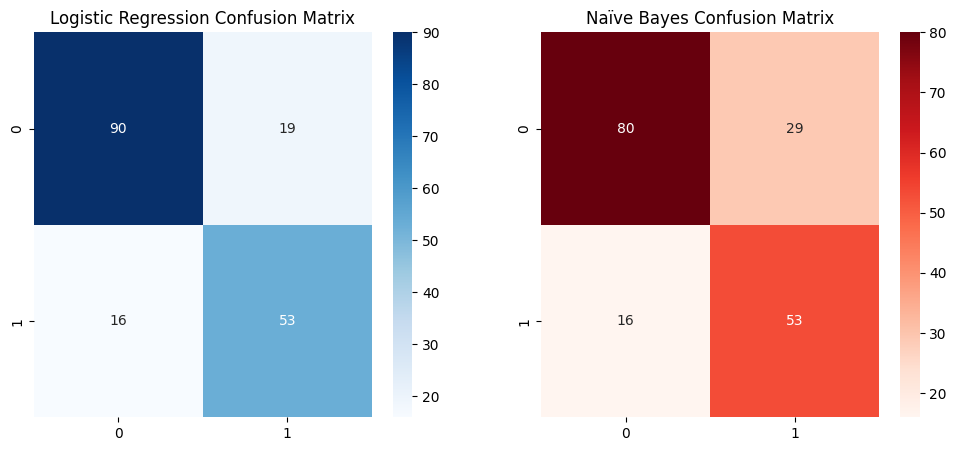

In [36]:
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(conf_matrix_log, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Logistic Regression Confusion Matrix")

sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Reds", ax=axes[1])
axes[1].set_title("Naïve Bayes Confusion Matrix")

plt.show()

Выводы
* Наивный байесовский классификатор предсказывает хуже, чем логистическая регрессия.
* Accuracy модели — примерно 0,8
